# PREDICTION USING SUPERVISED ML

#### TASK : Predict the percentage of an student based on the no. of study hours.


Author: Anbu Ezhilmathi Nambi  
Organisation: The Sparks Foundation

#### Importing all required libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from ipywidgets import interact, widgets,Layout
%matplotlib inline 

#### Reading the data from the given link :

In [2]:
df = pd.read_csv("http://bit.ly/w-data")
print("Dataset imported succesfully")
df.head() 

Dataset imported succesfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


#### Gaining insight of the given data:

In [3]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [4]:
df.describe() 

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


#### Checking for null values

In [5]:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

#### Visualizing the data
Scatter plot : shows the relation between study hours and student marks

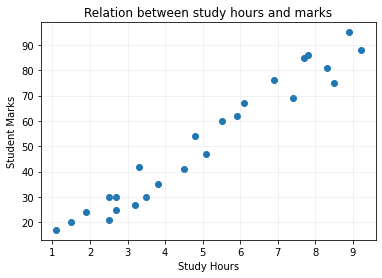

In [30]:
plt.scatter(x=df.Hours,y=df.Scores)
plt.xlabel("Study Hours")
plt.ylabel("Student Marks")
plt.title("Relation between study hours and marks")
plt.grid(alpha=0.2)
plt.show()

#### Splitting the dependent and independent variables:

In [7]:
X = df.iloc[:, :-1].values
y = df.iloc[:, 1].values

#### Train Test Split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25, random_state=0)

In [9]:
print("Train Data : ",len(X_train))
print("Test Data : ",len(y_test))

Train Data :  18
Test Data :  7


#### Training the Linear Regression Model

In [10]:
Linear_model =LinearRegression()
Linear_model.fit(X_train,y_train)
print('The model is trained')

The model is trained


### Finding the intercept and coefficient
#### Line Equation -> y = mx + c
#### m - Slope (Coefficient)
#### c - Intercept

In [11]:
print('The intercept (c):',Linear_model.intercept_)
print('Slope (m):',Linear_model.coef_)

The intercept (c): 1.932204253151646
Slope (m): [9.94167834]


#### Plotting the regression line:

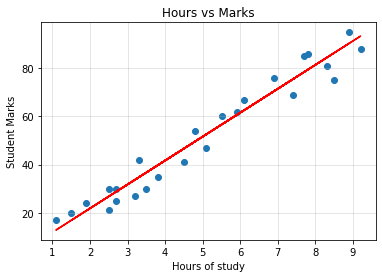

In [12]:
line_y = Linear_model.coef_ * X + Linear_model.intercept_
plt.scatter(X,y)
plt.plot(X, line_y, color = "red")
plt.grid(alpha = 0.4)
plt.title("Hours vs Marks")
plt.xlabel("Hours of study")
plt.ylabel("Student Marks")
plt.show()
#The red line is the line of best fit

#### Prediction of Scores for the test data

In [13]:
y_pred = Linear_model.predict(X_test)
print("The prediction is complete")

The prediction is complete


#### Comparing the Actual Data and Predicted Data

In [14]:
comparing_data =pd.DataFrame({'Actual Data': y_test, 'Predicted Data': y_pred})
comparing_data

,Actual Data,Predicted Data
0,20,16.844722
1,27,33.745575
2,69,75.500624
3,30,26.786400
4,62,60.588106
5,35,39.710582
6,24,20.821393


#### Model evaluation metrics

In [15]:
print("The mean absolute error: ",metrics.mean_absolute_error(y_test, y_pred))
print("The mean squared error: ",metrics.mean_squared_error(y_test, y_pred))

The mean absolute error:  4.130879918502486
The mean squared error:  20.33292367497997


In [16]:
pd.DataFrame(np.c_[X_test,y_test,y_pred],
columns=['Study Hours',
         'Marks Actual',
         'Marks Predicted'])

,Study Hours,Marks Actual,Marks Predicted
0,1.5,20.0,16.844722
1,3.2,27.0,33.745575
2,7.4,69.0,75.500624
3,2.5,30.0,26.786400
4,5.9,62.0,60.588106
5,3.8,35.0,39.710582
6,1.9,24.0,20.821393


In [17]:
Linear_model.score(X_test,y_test)

0.9367661043365055

#### Prediction for new input:

In [18]:
def PredictScore(x):
    hours = np.array(x).reshape(-1, 1)
    own_pred = Linear_model.predict(hours)
    print("No of Hours = {}".format(hours))
    print("Predicted Score = {}".format(own_pred[0]))

In [19]:
# Interactive UI widgets for predicting score
interact(PredictScore,
         x=widgets.FloatSlider(min=5,max=10,
                    value=9.25,
                    step=0.01,
                    description='Hours', 
                    layout=Layout(width='900px')))

interactive(children=(FloatSlider(value=9.25, description='Hours', layout=Layout(width='900px'), max=10.0, min…

<function __main__.PredictScore(x)>

#### Insights from the data
•	The student marks is in direct proportional to the study hours.   
•	As the study hours increase, the mark of the student also increases.    
•	The relation between marks and study is strong positive correlation

#### - Anbu Ezhilmathi Nambi
